In [1]:
import sys
import tensorflow as tf
import scipy.io
from scipy.io import loadmat
import matplotlib.pyplot as plt
from skimage.util import montage as montage2d
from glob import glob
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

In [2]:
sys.path.append("..")
from spatial_transform.aff_mnist_data import IMAGE_SIZE, IMAGE_SHAPE, IMAGE_NUM_CHANNELS, get_aff_mnist_data
from spatial_transform.spatial_transforms import AffineTransform, QuadraticTransform
from spatial_transform.st_blocks import SimpleSpatialTransformBlock
from spatial_transform.localization import StandardConvolutionalLocalizationLayer, CoordConvLocalizationLayer, LargeLocalizationLayer
from spatial_transform.interpolation import BilinearInterpolator
from spatial_transform.layers import RepeatWithSharedWeights
from spatial_transform.visualization import show_train_progress

In [3]:
train_img_data, train_img_label, validation_img_data, validation_img_label, test_img_data, test_img_label = get_aff_mnist_data()

In [4]:
image = tf.keras.layers.Input(shape=IMAGE_SHAPE + (IMAGE_NUM_CHANNELS,))

x = image
x = tf.keras.layers.Conv2D(32, [7, 7], activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(32, [5, 5], activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(60, activation='relu')(x)
x = tf.keras.layers.Dense(32, activation='relu')(x)
x = tf.keras.layers.Dense(10, activation=None)(x)

model = tf.keras.models.Model(inputs=image, outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 40, 40, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 34, 34, 32)        1600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 17, 17, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)              0         
_________________________________________________________________
dense (Dense)                (None, 60)                69180 

In [5]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3),
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

In [6]:
history = model.fit(
    x = train_img_data, 
    y = train_img_label, 
    batch_size = 128,
    epochs = 6,
    validation_data = (test_img_data,  test_img_label),
    validation_batch_size = 1024,
)

Epoch 1/6
12500/12500 [==============================] - 99s 8ms/step - loss: 0.5438 - accuracy: 0.8147 - val_loss: 0.0842 - val_accuracy: 0.9743
Epoch 2/6
12500/12500 [==============================] - 95s 8ms/step - loss: 0.0765 - accuracy: 0.9771 - val_loss: 0.0667 - val_accuracy: 0.9800
Epoch 3/6
12500/12500 [==============================] - 95s 8ms/step - loss: 0.0605 - accuracy: 0.9821 - val_loss: 0.0708 - val_accuracy: 0.9798
Epoch 4/6
12500/12500 [==============================] - 95s 8ms/step - loss: 0.0526 - accuracy: 0.9846 - val_loss: 0.0613 - val_accuracy: 0.9824
Epoch 5/6
12500/12500 [==============================] - 95s 8ms/step - loss: 0.0489 - accuracy: 0.9857 - val_loss: 0.0562 - val_accuracy: 0.9842
Epoch 6/6
12500/12500 [==============================] - 87s 7ms/step - loss: 0.0452 - accuracy: 0.9870 - val_loss: 0.0674 - val_accuracy: 0.9817


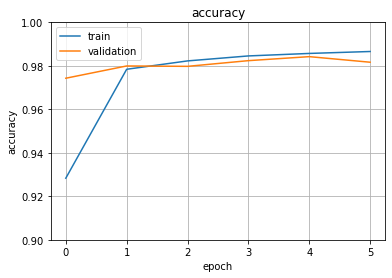

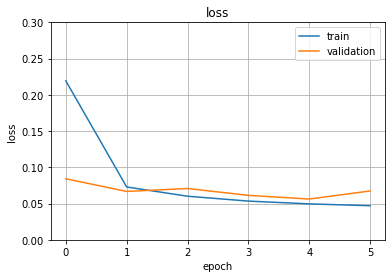

In [7]:
show_train_progress(history)